MULTIVARIATE FEATURE SELECTION

In machine learning and statistics, feature selection, also known as variable selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.
When you have a lot of features (like hundreds or thousands of them), then it really becomes impossible to go & manually check for every one of them or if you don’t have enough domain knowledge then you got to trust this following technique. So it is nothing but selecting multiple features at once.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('breast_cancer.csv')

In [4]:
data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [6]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

Splitting the dataset into training and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [14]:
data.drop(['Class'], axis = 1, inplace = True)

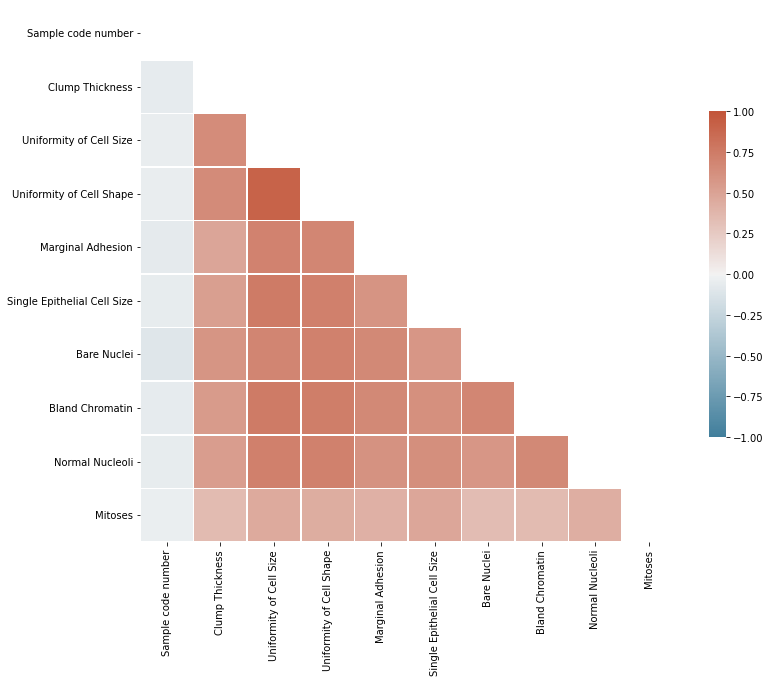

In [17]:
corr = data.corr()
# Creating mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, mask=mask, vmin=-1.0, vmax=1.0, center=0, cmap=cmap,
 square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [19]:
highly_correlated_features = []
for i, idx in enumerate(corr.index):
  for j, col in enumerate(corr.columns):
    if j <= i: continue
    if abs(corr.loc[idx, col]) > 0.90:
      print((idx, col), ":--> ", round(corr.loc[idx, col], 3))
      highly_correlated_features.append((idx, col))

('Uniformity of Cell Size', 'Uniformity of Cell Shape') :-->  0.907


In [20]:
len(highly_correlated_features)

1

Thus, here we can see that uniformity of cell size is highly correlated with uniformity of cell shape. Thus one of these two can be dropped without having any major loss of information